## Import Libraries



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from fastai.vision import *
import os
import pydicom
import matplotlib.pyplot as plt
import scipy.misc
import pandas as pd
import numpy as np
import imageio
import cv2

from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 


## Set Enviroment & Explore Data





In [ ]:
from zipfile import ZipFile


with ZipFile('/content/drive/MyDrive/DATA_DP4/train_jpg.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
with ZipFile('/content/drive/MyDrive/DATA_DP4/test_jpg.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
import shutil

# absolute path
src_path = r"/content/content/test_jpg"
dst_path = r"/content/content"
#shutil.move(src_path, dst_path)

## Classification in folders

In [ ]:
!mkdir /content/content/train
!mkdir /content/content/train/c

!mkdir /content/content/validation
!mkdir /content/content/validation/c

###  - Train

In [ ]:
# move csv to content
src_path = r"/content/drive/MyDrive/DATA_DP4/train90.csv"
dst_path = r"/content/content"
shutil.copy(src_path, dst_path)

'/content/content/train90.csv'

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

labels = pd.read_csv(r'/content/content/train90.csv', sep=';',decimal = ',')

train_dir =r'/content/content/train_png'
DR = r"/content/content/train/c"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename + '.jpg'
    dst_path = DR + str(class_name) + '/' + filename + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


In [ ]:
!rm -rf /content/content/train/c

###  - Validation

In [ ]:
# move csv to content
src_path = r"/content/drive/MyDrive/DATA_DP4/validation10.csv"
dst_path = r"/content/content"
shutil.copy(src_path, dst_path)

'/content/content/validation10.csv'

In [ ]:
# Train clasification
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

labels = pd.read_csv(r'/content/content/validation10.csv', sep=';',decimal = ',')

train_dir =r'/content/content/train_png'
DR = r"/content/content/validation/c"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename + '.jpg'
    dst_path = DR + str(class_name) + '/' + filename + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


In [ ]:
!rm -rf /content/content/validation/c

## Data Augmentation

In [ ]:
# Set path to root directory
path = Path("/content/content/")
path.ls

<bound method <lambda> of PosixPath('/content/content')>

In [ ]:
def get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1,
                   max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75,
                   p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None)->Collection[Transform]:
    "Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms."
    res = [rand_crop()]
    if do_flip:    res.append(dihedral_affine() if flip_vert else flip_lr(p=0.5))
    if max_warp:   res.append(symmetric_warp(magnitude=(-max_warp,max_warp), p=p_affine))
    if max_rotate: res.append(rotate(degrees=(-max_rotate,max_rotate), p=p_affine))
    if max_zoom>1: res.append(rand_zoom(scale=(1.,max_zoom), p=p_affine))
    if max_lighting:
        res.append(brightness(change=(0.5*(1-max_lighting), 0.5*(1+max_lighting)), p=p_lighting))
        res.append(contrast(scale=(1-max_lighting, 1/(1-max_lighting)), p=p_lighting))
    #       train                   , valid
    return (res + listify(xtra_tfms), [crop_pad()])

['c0', 'c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c2', 'c20', 'c21', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'] 22
1151 127


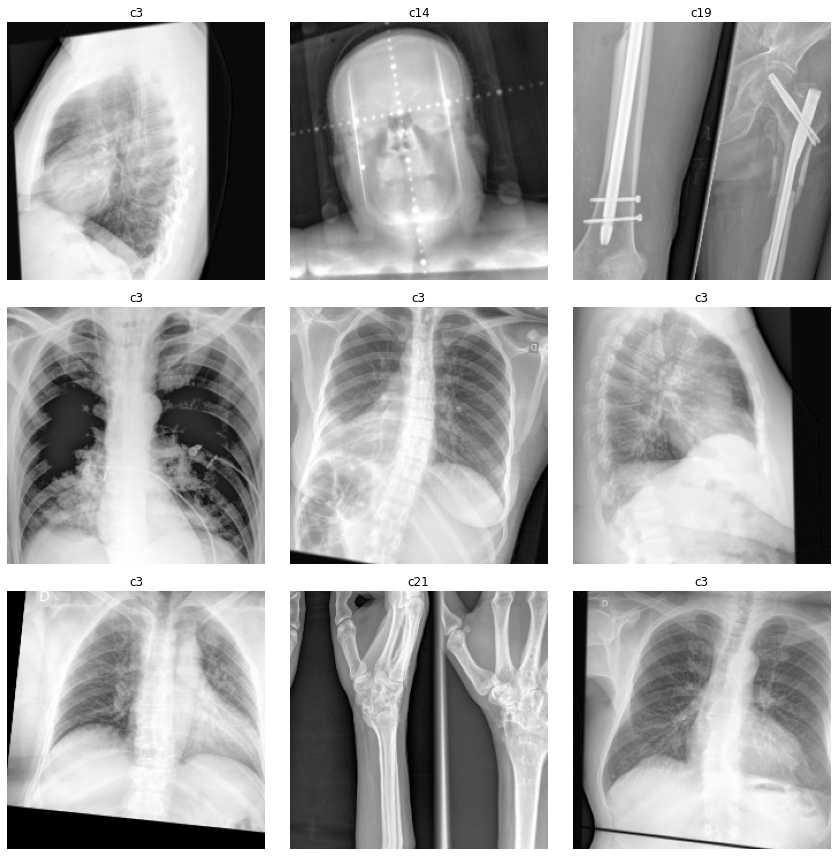

In [ ]:
# We are creating a fastai DataBunch from our dataset
# The transformers are already built into the model
data = ImageDataBunch.from_folder(path,test='test_jpg',train='train',valid='validation', size=224, 
                                  ds_tfms=get_transforms())
data.show_batch(rows=3)
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

In [ ]:
'''
# We are creating a fastai DataBunch from our dataset
# The transformers are already built into the model
data = ImageDataBunch.from_folder(path,test='test_jpg',train='train',valid='validation', size=300, 
                                  ds_tfms=get_transforms(zoom_crop(scale=(0.75,2), do_rand=True),dihedral( 7),
                                  max_zoom=1.1,max_warp=0.2, p_affine=0.75,max_rotate=10.0,max_lighting=0.2,
                                  p_lighting=0.4,flip_vert=False))
data.show_batch(rows=3)
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))
'''

"\n# We are creating a fastai DataBunch from our dataset\n# The transformers are already built into the model\ndata = ImageDataBunch.from_folder(path,test='test_jpg',train='train',valid='validation', size=300, \n                                  ds_tfms=get_transforms(zoom_crop(scale=(0.75,2), do_rand=True),dihedral( 7),\n                                  max_zoom=1.1,max_warp=0.2, p_affine=0.75,max_rotate=10.0,max_lighting=0.2,\n                                  p_lighting=0.4,flip_vert=False))\ndata.show_batch(rows=3)\n# See the classes and count of classes in your dataset\nprint(data.classes,data.c)\nprint(len(data.train_ds), len(data.valid_ds))\n"

In [ ]:
#Exploring size of the images


In [ ]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet18, metrics = [accuracy])

In [ ]:
# Train the model on 4 epochs of data at the default learning rate
# Ignore error rate/valid loss data here, decreasing train loss is all that matters
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,4.194692,2.692461,0.251969,02:28
1,3.176394,1.406997,0.653543,02:28
2,2.295665,0.750591,0.803150,02:30
3,1.702293,0.564277,0.874016,02:34
4,1.322100,0.408582,0.881890,02:34
5,1.041171,0.480448,0.881890,02:29
6,0.852466,0.407844,0.905512,02:30
7,0.705915,0.430346,0.889764,02:29
8,0.585331,0.348699,0.897638,02:27
9,0.497622,0.408912,0.874016,02:30


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


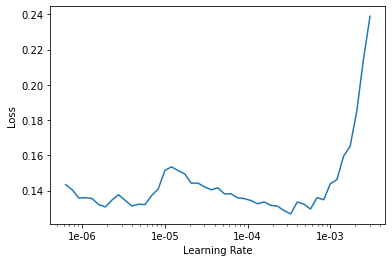

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=False)

In [ ]:
# Train the model on 4 epochs of data at the default learning rate
# Ignore error rate/valid loss data here, decreasing train loss is all that matters
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.085471,0.202284,0.944882,02:31
1,0.062440,0.219395,0.952756,02:30


In [ ]:
# Save the model
learn.save('0.937008')

# Load the Model
learn.load('0.937008')

Learner(data=ImageDataBunch;

Train: LabelList (1151 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
c0,c0,c0,c0,c0
Path: /content/content;

Valid: LabelList (127 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
c0,c0,c0,c6,c6
Path: /content/content;

Test: LabelList (328 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/content, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): 

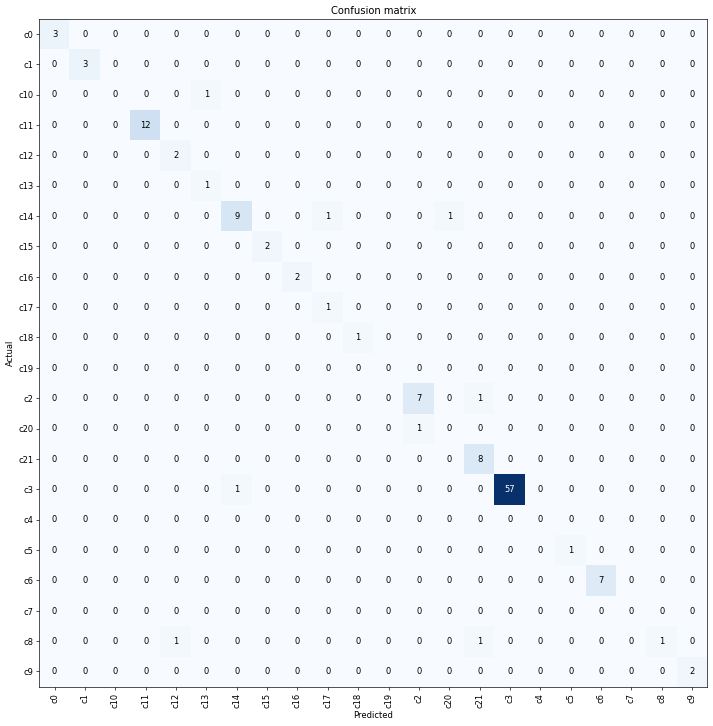

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

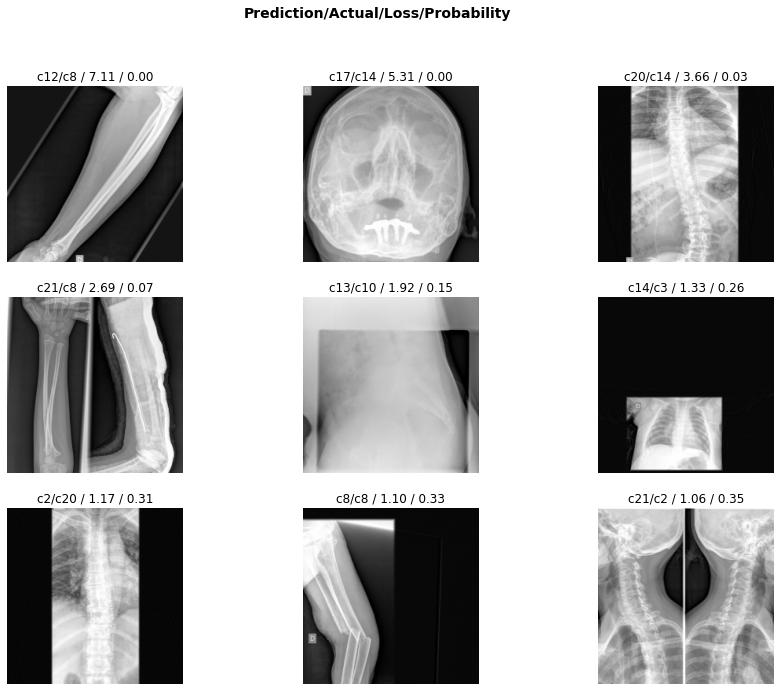

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=1)

[('c10', 'c13', 1),
 ('c14', 'c17', 1),
 ('c14', 'c20', 1),
 ('c2', 'c21', 1),
 ('c20', 'c2', 1),
 ('c3', 'c14', 1),
 ('c8', 'c12', 1),
 ('c8', 'c21', 1)]

## Submission

In [ ]:
preds_test, target_test = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds_test, dim=1)
y.numpy().shape

(328,)

In [ ]:
pred_classes=[]
for index in y:
  pred_classes.append(str(data.classes[index]))

len(pred_classes)

328

In [ ]:
num = len(learn.data.test_ds)
filenames=[]

In [ ]:
for i in range(num):
  filenames.append(str(learn.data.test_ds.items[i]).split('/')[4])

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/DATA_DP4/sample_submission.csv')
print(submission.shape)
submission['Target']=pred_classes
submission['SOPInstanceUID']=filenames
submission

(328, 2)


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.78508168266081517346...,c14
1,1.2.826.0.1.3680043.8.498.76288559028107802787...,c3
2,1.2.826.0.1.3680043.8.498.96341045777069078539...,c3
3,1.2.826.0.1.3680043.8.498.98598582831386029828...,c14
4,1.2.826.0.1.3680043.8.498.98937080810498864792...,c1
...,...,...
323,1.2.826.0.1.3680043.8.498.82416075832064488098...,c16
324,1.2.826.0.1.3680043.8.498.78092589205812056556...,c3
325,1.2.826.0.1.3680043.8.498.87997100783010008248...,c3
326,1.2.826.0.1.3680043.8.498.82925356439320671608...,c6


In [ ]:
submission

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.78508168266081517346...,c14
1,1.2.826.0.1.3680043.8.498.76288559028107802787...,c3
2,1.2.826.0.1.3680043.8.498.96341045777069078539...,c3
3,1.2.826.0.1.3680043.8.498.98598582831386029828...,c14
4,1.2.826.0.1.3680043.8.498.98937080810498864792...,c1
...,...,...
323,1.2.826.0.1.3680043.8.498.82416075832064488098...,c16
324,1.2.826.0.1.3680043.8.498.78092589205812056556...,c3
325,1.2.826.0.1.3680043.8.498.87997100783010008248...,c3
326,1.2.826.0.1.3680043.8.498.82925356439320671608...,c6


In [ ]:
pd.DataFrame(submission)

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.78508168266081517346...,c14
1,1.2.826.0.1.3680043.8.498.76288559028107802787...,c3
2,1.2.826.0.1.3680043.8.498.96341045777069078539...,c3
3,1.2.826.0.1.3680043.8.498.98598582831386029828...,c14
4,1.2.826.0.1.3680043.8.498.98937080810498864792...,c1
...,...,...
323,1.2.826.0.1.3680043.8.498.82416075832064488098...,c16
324,1.2.826.0.1.3680043.8.498.78092589205812056556...,c3
325,1.2.826.0.1.3680043.8.498.87997100783010008248...,c3
326,1.2.826.0.1.3680043.8.498.82925356439320671608...,c6


In [ ]:
submission['Target'] = submission['Target'].str.replace("c","")

In [ ]:
submission['SOPInstanceUID'] = submission['SOPInstanceUID'].str.replace(".jpg","")

In [ ]:
submission

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.78508168266081517346...,14
1,1.2.826.0.1.3680043.8.498.76288559028107802787...,3
2,1.2.826.0.1.3680043.8.498.96341045777069078539...,3
3,1.2.826.0.1.3680043.8.498.98598582831386029828...,14
4,1.2.826.0.1.3680043.8.498.98937080810498864792...,1
...,...,...
323,1.2.826.0.1.3680043.8.498.82416075832064488098...,16
324,1.2.826.0.1.3680043.8.498.78092589205812056556...,3
325,1.2.826.0.1.3680043.8.498.87997100783010008248...,3
326,1.2.826.0.1.3680043.8.498.82925356439320671608...,6


In [ ]:
submission.to_csv(r'/content/drive/MyDrive/Colab Notebooks/submission.csv', index = False)